<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h3><center>Andrey Shestakov (<a href="mailto:avshestakov@hse.ru">avshestakov@hse.ru</a>)</center></h3>
<hr>
<h2><center>Neural Networks 1<sup><a href="#fn1" id="ref1">1</a></sup></center></h2>



<sup id="fn1">1. Some materials are taken from <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29">machine learning course of Victor Kitov</a></sup>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18,12)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

from ipywidgets import interact, IntSlider, fixed, FloatSlider
    
import warnings
warnings.filterwarnings('ignore')

# Let's recall previous lecture

## Boosting, Ensembles

* Construction of multiple models to increase model quality
    * In parallel (Bagging, Blending, Stacking, Random Forest)
    * Sequentially (Boosting)
* Works great!
* Hard to interpret

# Neural Networks

## History

* Neural networks originally appeared as an attempt to model human brain
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"> <img width=400 src='img/Human brain.jpg'></th>
    <th class="tg-031e"> <img width=500 src='img/neural-network-cells.jpg'></th>
  </tr>
</table>
* Human brain consists of multiple interconnected neuron cells 

    * cerebral cortex (the largest part) is estimated to contain 15-33 billion neurons
    * communication is performed by sending electrical and electro-chemical signals
    * signals are transmitted through axons - long thin parts of neurons. 

## [History](https://www.import.io/post/history-of-deep-learning/)

* 1943 – The first mathematical model of a neural network (Walter Pitts and Warren McCulloch)
* 1957 – Setting the foundation for deep neural networks (Frank Rosenblatt)
* 1965 – The first working deep learning networks
* 1979-80 – An ANN learns how to recognize visual patterns
* 1982 – The creation of the Hopfield Networks
* 1989 – Machines read handwritten digits (Yann LeCun)
* 1997 – Long short-term memory was proposed (Jürgen Schmidhuber and Sepp Hochreiter)
* 1998 – Gradient-based learning (Yann LeCun)
* 2011 – Creation of AlexNet
* 2014 – Generative Adversarial Networks (GAN)

## Simple model of a neuron

<center><img src='img/neuron-diagram.jpg'></center>

* Neuron get's activated in the half-space, defined by $b+w_{1}x^{1}+w_{2}x^{2}+...+w_{D}x^{D}\ge0$.
* Each node is called a **neuron**
* Each edge is associated a **weight**
* Constant feature $b$ stands for **bias** (some times reffered as $w_0$)


## Multilayer perceptron architecture

* Hierarchically nested set of neurons.
* Each node has its own weights.

<center><img src='img/mpl.png'></center>

This is structure of multilayer perceptron - acyclic directed graph.

## Layers

<center><img src='img/Neural_network_achitecture.png'></center>

* Structure of neural network: 
    * 1-input layer
    * 2-hidden layers
    * 3-output layer

## Continious activations
* Pitfall of $\mathbb{I}[]$: it causes stepwise constant outputs, weight optimization methods become inapliccable.
* We can replace $\mathbb{I}[w^{T}x+w_{0}\ge0]$ with smooth activation $f(w^{T}x+w_{0})$ 

<center><img src='img/sigmoid approximates step function.png'></center>

## Typical activation functions

* sigmoidal: $\sigma(x)=\frac{1}{1+e^{-x}}$ 
     * 1-layer neural network with sigmoidal activation is equivalent to logistic regression
     <center><img src='img/sigmoid-activation-function.png', width=700></center>
* hyperbolic tangent: $tangh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$ 
    <center><img src='img/tanh-1.png', width=700></center>


## Typical activation functions
     
* ReLU: $f(x)=[x]_{+}$.

<center><img src='img/relu-activation-function-1.png', width=700></center>

## Activation function zoo

<center><img src='img/activ_functions.png', width=1200></center>

<center><img src='img/nn_zoo.jpg'></center>

## [TensorFlow PlayGround](https://playground.tensorflow.org)

# Output Generation

## Output generation

* Forward propagation is a process of successive calculations of neuron outputs for given features.

<center><img src='img/Forward propagation.png'></center>

## Definition details


* Label each neuron with integer $j$.
* Denote: $I_{j}$ - input to neuron $j$, $O_{j}$ - output of neuron $j$
* Input to neuron $j$: $I_{j}=\sum_{k\in inc(j)}w_{kj}O_{k}+w_{0j}$,
* Output of neuron $j$: $O_{j}=f(I_{j})$.

    * $w_{0j}$ is the bias term
    * $f(x)$ is the activation function
    * $inc(j)$ is a set of neurons with outgoing edges incoming to neuron $j$.
    * further we will assume that at each layer there is a vertex with constant output $O_{const}\equiv1$, so we can simplify notation

$$
I_{j}=\sum_{k\in inc(j)}w_{kj}O_{k} 
$$

## Activations at output layer

* **Regression**: $f(I)=I$ (linear activation)
* **Classification**:
    * binary: $y\in\{+1,-1\}$
$$
f(I)=p(y=+1|x)=\frac{1}{1+e^{-I}}
$$
    * multiclass: $y\in{1,2,...C}$
$$
f(I_{1},...I_{C})=p(y=j|x)=\frac{e^{I_{j}}}{\sum_{k=1}^{C}e^{I_{k}}},\,j=1,2,...C
$$
where $I_{1},...I_{C}$ are inputs of output layer.

## Generalizations

* each neuron $j$ may have custom non-linear transformation $f_{j}$
* weights may be constrained:
    * non-negative
    * equal weights
    * etc.
* layer skips are possible
<center><img src="img/Layer skipping.png"></center>
* Not considered here: RBF-networks, recurrent networks.

## Number of layers selection

* Number of layers usually denotes all layers except input layer (hidden layers+output layer)

* **Classification**:

    * single layer network selects arbitrary half-spaces
    * 2-layer network selects arbitrary convex polyhedron (by intersection of 1-layer outputs)
        * therefore it can approximate arbitrary convex sets
    * 3-layer network selects (by union of 2-layer outputs) arbitrary finite sets of polyhedra
        * therefore it can approximate almost all sets with well defined volume

## Number of layers selection

* **Regression**:
    * single layer can approximate arbitrary linear function
    * 2-layer network can model indicator function of arbitrary convex polyhedron
    * 3-layer network can uniformly approximate arbitrary continuous function (as sum weighted sum of indicators convex polyhedra)


* **Sufficient amount of layers**

<center> Any continuous function on a compact space can be uniformly approximated
by 2-layer neural network with linear output and wide range of activation
functions (excluding polynomial).  </center>

* In practice often it is more convenient to use more layers with less total amount of neurons
    * model becomes more interpretable and easy to fit.

# Neural network optimization

## Network optimization: regression

* Single output:

$$
\frac{1}{N}\sum_{n=1}^{N}(\widehat{y}_{n}(x_{n})-y_{n})^{2}\to\min_{w}
$$
* K outputs

$$
\frac{1}{NK}\sum_{n=1}^{N}\sum_{k=1}^{K}(\widehat{y}_{nk}(x_{n})-y_{nk})^{2}\to\min_{w}
$$

## Network optimization: classification

* Two classes ($y\in\{0,1\}$):

$$
\prod_{n=1}^{N}p(y_{n}=1|x_{n})^{y_{n}}(1-p(y_{n}=1|x_{n})){}^{1-y_{n}}\to\max_{w}
$$

* $C$ classes ($y_{nc}=\mathbb{I}\{y_{n}=c\}$):

$$
\prod_{n=1}^{N}\prod_{c=1}^{C}p(y_{n}=c|x_{n})^{y_{nc}}\to\max_{w}
$$
* In practice log-likelihood  (cross-entropy) is maximized

## Neural network optimization

* Let $L(\widehat{y},y)$ denote the loss function of output


* We may optimize neural network using gradient descent:
    
        k=0
        initialize randomly w_0 # small values for sigmoid and tangh

        while stop criteria not met:
            w_k+1 := w_k - alpha * grad(L(w_k))
            k := k+1

* Standardization of features makes gradient descend converge faster
* But how exactly do we efficiently calculate grad(L(w_k))?

# Backpropagation algorithm

<center><img src='img/backprop_spidey.jpeg', width=800></center>

## Idea

<center><img src='img/backprop.png'></center>

## Definitions

* Denote $w_{ij}$ as weight of edge, connecting $i$-th and $j$-th neuron
* Define $\delta_j = \frac{\partial L}{\partial I_j} =  \frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial I_j}$
* Since $L$ depends on $w_{ij}$ through the following functional relationship $L(w_{ij}) = L\left(O_j\left(I_j(w_{ij})\right)\right)$, using the chain rule we get:
$$ \frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial I_j}\frac{\partial I_j}{\partial w_{ij}} = \delta_j O_i$$
because $\frac{\partial I_j}{\partial w_{ij}} = \frac{\partial}{\partial w_{ij}} \left(\sum\limits_{k\in inc(j)} w_{kj} O_k\right) = O_i$, where $inc(j)$ is a set of neurons with outgoing edges to neuron $j$


## Output layer

* If neuron $j$ belongs to the output node, then error $\frac{\partial L}{\partial O_j}$ is calculated easily
* For output layer $\delta_j$ are calculated directly:
$$ \delta_j= \frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial I_j} = \frac{\partial L}{\partial O_j} f'(I_j) \qquad (1)$$
* Example (single point $x$ and true vector of outputs $(y_1,\dots,y_{|OL|})$:
    * For $L = \frac{1}{2}\sum\limits_{j\in OL}(O_j - y_j)^2$ and sigmoid activation
    $$ \frac{\partial L}{\partial O_j} = O_j - y_j $$
    * Sigmoid activation function $O_j = \sigma(I_j)$:
    $$ f'(I_j) = \sigma(I_j)(1-\sigma(I_j)) = O_j(1-O_j) $$
    * finally
    $$ \delta_j = (O_j - y_j)O_j(1-O_j)$$

## Inner layer

* If neuron $j$ belongs to some hidden layer, denote $out(j) = \{k_1, k_2, \dots, k_m\}$ the set of all neurons, receiving output of neuron $j$ as their input
* The effect of $O_j$ on $L$ is fully absorbed by $I_{k_1},I_{k_2},\dots,I_{k_m}$, so
$$ \frac{\partial L(O_j)}{\partial O_j} = \frac{\partial L(I_{k_1},I_{k_2},\dots,I_{k_m})}{\partial O_j} = \sum\limits_{k\in out(j)} \left( \frac{\partial L}{\partial I_k} \frac{\partial I_k}{\partial O_j} \right) = \sum\limits_{k\in out(j)} \left(\delta_k w_{jk}\right)$$
* So for layers other than output layer we have:
$$ \delta_j = \frac{\partial L}{\partial I_j} =  \frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial I_j} = \sum\limits_{k\in out(j)} \left(\delta_k w_{jk}\right) f'(I_j) \qquad (2)$$
* Weight derivatives are calculated using errors and outputs:
$$ \frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial I_j}\frac{\partial I_j}{\partial w_{ij}} = \delta_jO_i \qquad (3)$$


## Backprop

1. Forward propagate $x_n$ to the neural network, store all inputs $I_j$ and outputs $O_j$ for each neuron
2. Calculate $\delta_i$ for all $i \in$ output layer using $(1)$
$$ \delta_j = \frac{\partial L}{\partial O_j} f'(I_j) $$
3. Propagate $\delta_i$ from final layer back layer by layer $(2)$
$$ \delta_j = \sum\limits_{k\in out(j)} \left(\delta_k w_{jk}\right) f'(I_j)$$
4. Using calculated deltas and outputs calculate $\frac{\partial L}{\partial w_{ij}}$ with $(3)$
$$ \frac{\partial L}{\partial w_{ij}} = \delta_jO_i $$
And update weights


<center><img src='img/backprop2.gif'></center>

### Multiple local optima problem

* Optimization problem for neural nets is **non-convex**.
* Different optima will correspond to:
    * different starting parameter values
    * different training samples

* So we may solve task many times for different conditions and then
    * select best model
    * alternatively: average different obtained models to get ensemble

* And/Or use some complex optimization methods
<center><img src='img/optimization.gif'></center>

In [3]:
def sigmoid(x):
    return 1./(np.exp(-x) + 1)

### Vanishing Gradient Problem

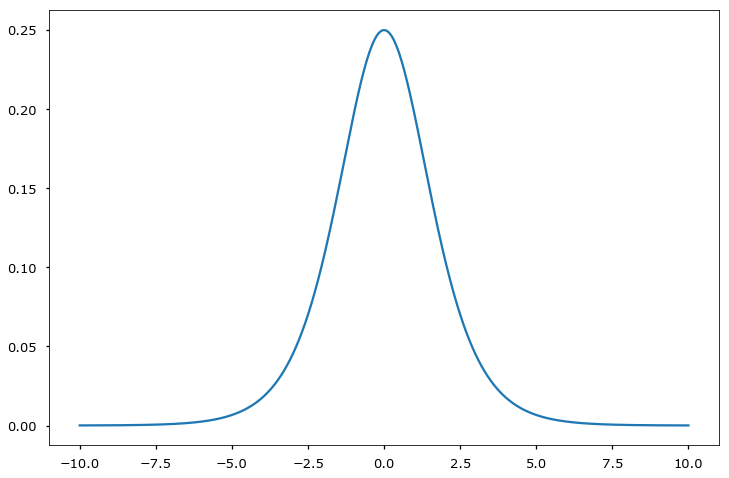

In [4]:
x = np.linspace(-10, 10, 1000)
gr_sigm = sigmoid(x)*(1-sigmoid(x))

plt.plot(x, gr_sigm)

* Feature scaling
* Careful weight initialization
* Using ReLU activation function

## Model complexity and overfitting

* Constrain model directly:
    * constrain number of neurons
    * constrain number of layes
    * impose constraints on weights
* Take a flexible model
    * early stopping (with validation set)
    * L2 regularization
    $$ L(w) + \lambda\sum_i w_i^2 $$
* Augmentation (more used in convnets)

# Other things to know

## Weight Initialization

* Poor weight initialization can lead to vanishing or exploding gradient problem
* Variance of a layer affects variance of the next one
* Initialize weights in such manner to keep variance constant (Xavier initialization)
* More [here](http://www.deeplearning.ai/ai-notes/initialization/)

## Dropout technique

* Have L1 and L2 regularization for weights
* Can complement it with Dropout
<center><img src='img/dropout.png'></center>
* Training: Dropout can be interpreted as sampling a Neural Network within the full Neural Network
* Testing: not applied

## Batch Normalization

* Bad Weight Initialization
* Vanishing Gradients
* Normalize data right before non-linearities (or after ?!)

<center><img src='img/bn_algorithm.png' width=600></center>

## Conclusion

* Advantages of neural networks:
    * can model accurately complex non-linear relationships
    * easily parallelizable

* Disadvantages of neural networks:
    * hardly interpretable ("black-box" algorithm)
    * optimization requires skill
        * too many parameters
        * may converge slowly
        * may converge to inefficient local minimum far from global one


# Useful Refs
* [Yes you should understand backprop](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b)
* [CS231N](http://cs231n.github.io/)
* [Livecoding Madness!](https://www.youtube.com/watch?v=o64FV-ez6Gw)